In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [30]:
n_neighbors = 15

In [25]:
iris = datasets.load_iris()

In [26]:
X = iris.data[:,:2]
y = iris.target

In [27]:
h = .02

In [28]:
cmap_light = ListedColormap(['white', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

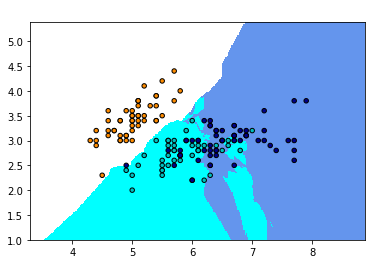

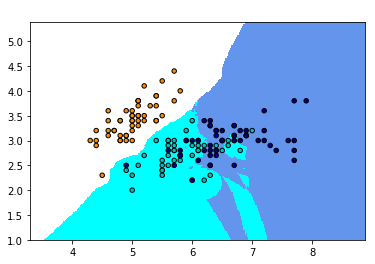

In [29]:
for weights in ['uniform', 'distance'] :
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X,y)
    
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
            
    z = z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, z, cmap=cmap_light)
    
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = {}, weights = '{}')".format(n_neighbors, weights), color='white')
plt.show()